# Fundamental behaviour of Gold Prices over the last 70 yrs

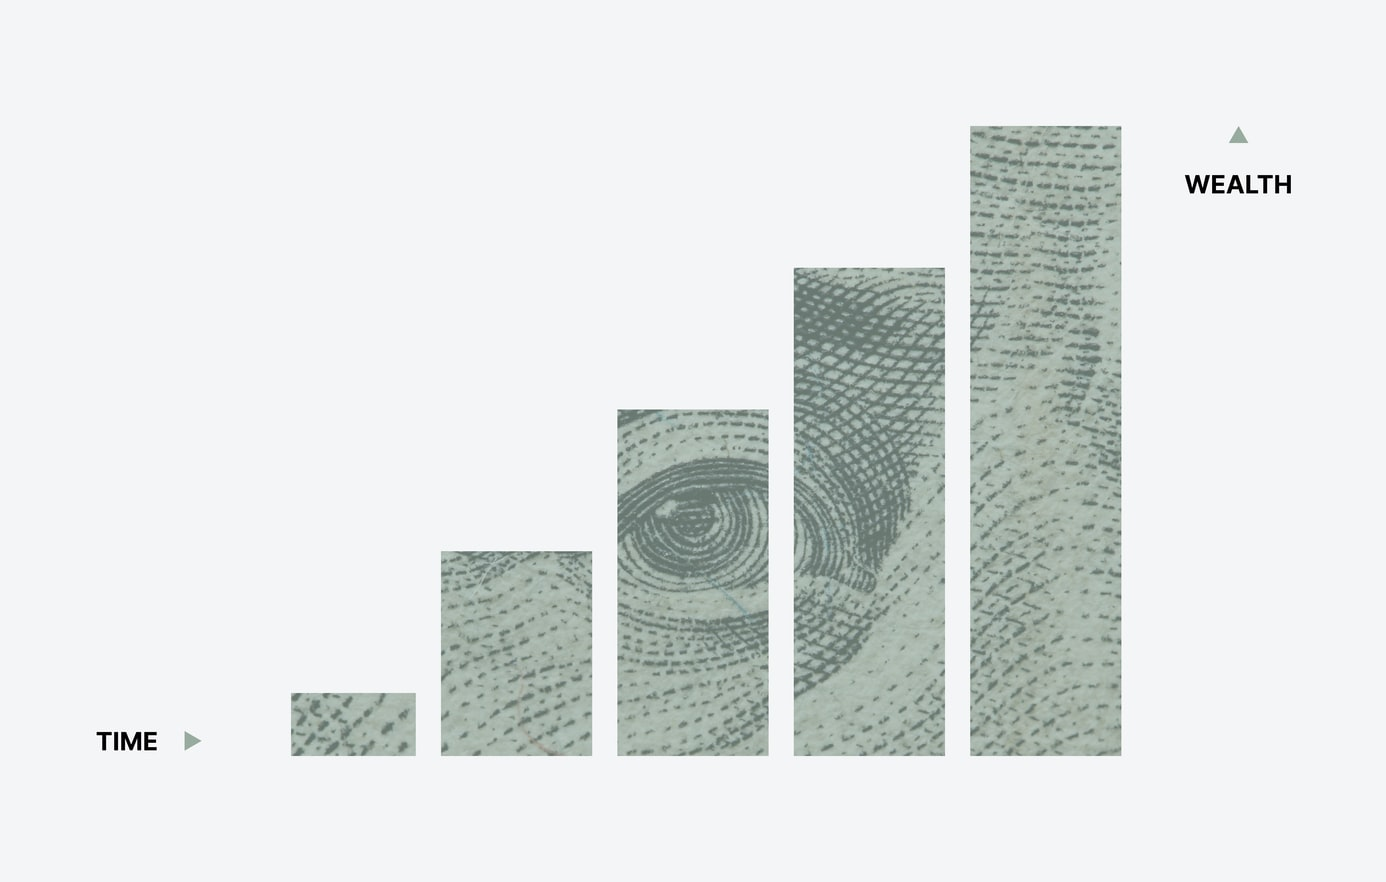

## Objective (purpose of my notebook)

The objective of this notebook is to explore the prices of gold over time. The analysis will follow an exploratory research into how gold prices have moved over the decades and try to explain the reasons behind them.

Following the exploratory research, we will look into the predictive side and see if we can make some sensible conclusion about gold prices or some other proxy which maybe related to gold prices. My aim is to not create an investor report or provide an investment recommendation as the final product. I simply want to explore the behaviour of gold prices in the financial market.


# Table of Contents
*coming soon*

# Literature Review
## Gold trading introduction
Gold is an asset which is widely traded around the globe. There are currently 6 major trading hubs which are London OTC market, COMEX, Shanghai Futures Exchange (SHFE), Shanghai Gold Exchange, Other gold exchange locations (Dubai, India, Japan, Singapore, and Hong Kong) finally there are gold ETFs (Exchange Traded Funds). Out of the 6 hubs, London OTC market, US futures market and Shanghai Gold Exchange create 90% of global trading volumes [1]. 

It is important to note that the London OTC market is unregulated due to being OTC (Over the Counter) market i.e., the market is not centralised but works as a dealer operated market segment. Trading in an OTC has pros and cons, but it is critical to note that OTC markets are less regulated and leads to public information which can be outdated data and corruption to some extent. On the flip side there is the Shanghai Futures Exchange which is regulated and has a centralised system to allow for transactions to clear between market participants. Exchanges are transparent and maintain an order book which the market participants register their buying/selling interest on [3]. Within a centralised system if a market participant borrows money to hold a position in the exchange and if their position drops below the margin, then the broker has the right to sell the market participants position to maintain stability. This risk protection method is called margin call and it ensures that the clearing house (exchange) is working as expected to reduce counterparty risk (essentially a fee for running the exchange smoothly).

Gold can also be borrowed in the same way as normal currencies [4]. O’Connor et al. have stated that gold borrowing has been on the decline since 2001. The primary target of gold leasing demand has traditionally been jewellers and gold miners who borrow gold to either sell a processed item or sell forward to finance production. 




# References (IEEE citing style)
[1]A. Hamilton, "Gold stocks exhibit strong seasonality - The Bull", The Bull, 2020. [Online]. Available: https://thebull.com.au/gold-stocks-exhibit-strong-seasonality/. [Accessed: 28- Apr- 2021].

[2]"Major global trading hubs", World Gold Council, 2021. [Online]. Available: https://www.gold.org/what-we-do/gold-market-structure/global-gold-market. [Accessed: 28- Apr- 2021].

[3]"Gold Trading: OTC vs. exchange", World Gold Council, 2021. [Online]. Available: https://www.gold.org/what-we-do/gold-market-structure/gold-trading-exchange-vs-otc#:~:text=The%20two%20primary%20forms%20of,found%20in%20various%20market%20centres. [Accessed: 28- Apr- 2021].

[4]F. O'Connor, B. Lucey, J. Batten and D. Baur, "The financial economics of gold — A survey", International Review of Financial Analysis, vol. 41, pp. 186-205, 2015. Available: 10.1016/j.irfa.2015.07.005.


# Research question

<!-- *Sorry hidden away since I want to keep this a secret for the time being* 😬 -->

1. The temporal nature of gold prices over the last 7 decades

    a. Perform basic statistical analysis i.e. normal distribution (skewness and kurtosis)
    
    b. Perform autocorrelation on data to find seasonal patterns
    
    c. How much gold is being produced against price of gold over time.
    
    d. Relationship of gold with Aussie inflation (This story might be interesting, considering Australia is a fiat currency)
    
    e. Identify products and markets which can be affected by gold (research piece written)
  
<!-- 2. The relationship of commodities, bond market and stock market

    a. The tango between gold and oil prices globally. Perform relatioship analysis.
    
    b. Bond market and gold market
    
    c. Stock market and gold market
    
    d. All three and gold market
    
3. Gold prices, FOREX and inflation

    a. Can gold price increase indicate increase in inflation?
    
    b. Affect of gold prices on EU/USD/AUD/JPY/INR/RMB
 
4. Predicting gold prices (*needs further research*) -->



# Data Management

In [ ]:
#Libs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisaton
import plotly.offline as py # plotly offline working for notebook
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
py.init_notebook_mode(connected = True)
pd.options.plotting.backend = "plotly"
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [ ]:
#Dataframes
monthly_df = pd.read_csv("/kaggle/input/gold-prices/monthly_csv.csv")
annual_df = pd.read_csv("/kaggle/input/gold-prices/annual_csv.csv")

#Numerical data
monthly_df['Price'] = monthly_df['Price'].astype('float64')
annual_df['Price'] = annual_df['Price'].astype('float64')

#Date Data
monthly_df['Date'] = pd.to_datetime(monthly_df['Date'])
annual_df['Date'] = pd.to_datetime(annual_df['Date'])

monthly_df.set_index('Date', inplace = True)
annual_df.set_index('Date', inplace = True)


In [ ]:
monthly_df.info()

In [ ]:
annual_df.info()

# Research Topic: Temporal Nature of Gold Prices over the last 7 decades

The effect of time on gold prices is the first research point which will be explored in this notebook. The exploration of temporal effects on gold prices will lay the foundational understanding on gold price behaviour over time. 

## Essential Graphs
Elementary graphing of gold prices monthly and annually. The difference between future value and past shows changes in value and this will also be displayed in the elementary graphs section. Finally, the use of exponential weighted moving average will provide moving average graph with importance to present values rather than past. 

<!-- 1. GFC
2. Tech bubble 
3. Gold ETF and futures
4. Covid -->


In [ ]:
monthly_df['Price'].plot(kind = 'line', title = "Monthly Gold prices from 1950 to 2020")

In [ ]:
annual_df['Price'].plot(kind = 'line', title = "Annual Gold prices from 1950 to 2020")

In [ ]:
#Performing exponential moving average with a 12 and 24 month time window
monthly_df['EMA_12'] = monthly_df['Price'].ewm(span = 12, adjust = False).mean()
monthly_df['EMA_24'] = monthly_df['Price'].ewm(span = 24, adjust = False).mean()
monthly_df['diff'] = monthly_df['Price'].diff()
annual_df['diff'] = annual_df['Price'].diff()

In [ ]:
monthly_df.head()

In [ ]:
monthly_df.plot(kind = 'line', title = "Monthly Gold Prices against Exponential Moving Avg (Span = 12 and 24 months) and price difference")

Noise is more apparent at certain time periods. 1980 and after 2008 there is large presence of noise in the price of gold. The exponential moving average with 12 and 24 month window show areas of buy and sell. For example if EMA_12 crosses EMA_24 from the top then it is an indicator that prices are going down, simillarly if EMA_12 crosses EMA_24 from the bottom and then starts to lead it is an indicator that prices are beginning to go up. 

## Perform basic statistical analysis i.e. normal distribution (skewness and kurtosis)

In [ ]:
#Monthly data normal distirbution
group_labels_mon = ['Monthly Gold Price Data']
fig = ff.create_distplot([monthly_df['Price']], group_labels = group_labels_mon, show_hist = False)
fig.update_layout(title_text= "Monthly gold price data distribution")
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(monthly_df['Price'])))
print( 'Skewness of normal distribution: {}'.format(stats.skew(monthly_df['Price'])))
fig.show()

In [ ]:
group_labels_ann = ['Annual Gold Price Data']
fig_2 = ff.create_distplot([annual_df['Price']], group_labels = group_labels_ann, show_hist = False)
fig_2.update_layout(title_text= "Annual gold price data distribution")
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(annual_df['Price'])))
print( 'Skewness of normal distribution: {}'.format(stats.skew(annual_df['Price'])))
fig_2.show()

In [ ]:
monthly_df['Price'].describe()

In [ ]:
annual_df['Price'].describe()

Monthly and Annual gold prices are skewed positively towards the lower end of the gold prices with high frequency distribution. The higher price end has a lower frequency and consequently means that the expected price of gold is on the lower end (\\$416.55 monthly and \\$412.77 annually). Also, the positive kurtosis implies heavy tail events are likely to occur which is obvious from the high frequency of data points at the lower end of the price range. 

From this information it can be understood that gold prices in recent years have increased dramatically and have moved very far away from the mean. The gold price movement is un-chartered territory as statistical indicators have implied that gold prices at such high levels have never been observed in high numbers i.e. frequency distribution is sparse


## Perform autocorrelation on data to find seasonal patterns

In [ ]:
monthly_df['diff'].iloc[0] = 0
annual_df['diff'].iloc[0] = 0

In [ ]:
# Draw Plot
plot_acf(monthly_df['diff'].tolist(), lags=100, title = 'Autocorrelation of Monthly Gold Prices')
plt.show()

In [ ]:
plot_acf(annual_df['diff'].tolist(), lags=50, title = 'Autocorrelation of Monthly Gold Prices')
plt.show()

The monthly autocorrelation graph shows some spikes out of the 95% CI (Confidence Interval) region. However, there is no evidence to conclude that there is correlation to past events. There is simply no observing factors to conclude the future patterns correlated to past patterns, hence there is no seasonality with a 100 day lag factor. 

## How much gold is being produced against the price of gold over time.

In [ ]:
#Data Source: https://ourworldindata.org/grapher/gold-production
#Data Description: Annual gold production, measured in metric tons per year.

gold_prd_df = pd.read_csv("../input/gold-production-data/gold-production.csv")
gold_prd_df['Entity'] = gold_prd_df['Entity'].astype('category')
gold_prd_df['Code'] = gold_prd_df['Code'].astype('category')

gold_prd_df_world = gold_prd_df[gold_prd_df['Code'] == "OWID_WRL"]
gold_prd_df_world.set_index('Year', inplace = True)

In [ ]:
gold_prd_df_world.head()

In [ ]:
gold_prd_df_world['Gold Production (Clio-Infra & USGS)'].plot(kind = 'line', title = "Global gold production data recorded from 1681 to 2015")

The growth in gold production started to boom after the gold rush time periond of 1850! (awesome to see history in action)

In [ ]:
var_1 = annual_df[annual_df.index <= "2016"]['Price'].tolist()
var_2 = gold_prd_df_world[gold_prd_df_world.index >= 1950]['Gold Production (Clio-Infra & USGS)'].tolist()
out = zip(var_1, var_2)
idx = annual_df.index.tolist()
idx = [x for x in idx if x <= datetime.datetime(2016, 1, 12)]
cnct_df_gold_price_prod = pd.DataFrame(out, columns = ['Price', 'Production'], index = idx)

In [ ]:
cnct_df_gold_price_prod.plot(kind = 'line', title = 'Global gold price vs production from 1950 to 2015.')

Gold price data looks mirrored to gold production data i.e. if pulled a line between the two graphs it will create a mirror. This does make sense, since as the production level of gold reduces the price of gold is expected to increase. It is quite astonishing to see this phenomenon in play in reality (I have more thoughts on this but I will think more critically before making a statement for now)

(**Till then I will default to our friend Morpheus**)

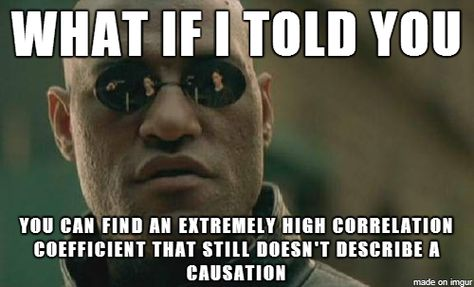

## Relationship of gold with Aussie inflation (This story might be interesting, considering Australia has a fiat currency)

In [ ]:
aus_infl_data = pd.read_csv("../input/australianinflationdata/australia-inflation-rate-cpi.csv")
aus_infl_data['date'] = pd.to_datetime(aus_infl_data['date'])
aus_infl_data.set_index('date', inplace = True)
aus_infl_data[' Annual Change'].iloc[0] = 0
aus_infl_data.dropna(axis = 1, inplace = True)

In [ ]:
aus_infl_data.info()

In [ ]:
aus_infl_data[aus_infl_data.index <= "2016"].plot(kind = 'line')

Inflation over time has gone down, implying Aus dollar has improved its demand over time. 

In [ ]:
var_1 = annual_df[(annual_df.index <= "2016") & (annual_df.index >= "1950")]['Price'].tolist()
var_2 = gold_prd_df_world[gold_prd_df_world.index >= 1960]['Gold Production (Clio-Infra & USGS)'].tolist()
var_3 = aus_infl_data[aus_infl_data.index <= "2016"][' Annual Change'].tolist()
out_1 = zip(var_1, var_2, var_3)
idx = annual_df.index.tolist()
idx = [x for x in idx if (x <= datetime.datetime(2016, 1, 12) and x >= datetime.datetime(1960, 1, 12))]
gold_pric_prd_infl_df = pd.DataFrame(out_1, columns = ['Annual Price','Annual Production', 'Annual Inflation (%)'], index = idx)

In [ ]:
fig = make_subplots(specs = [[{"secondary_y": True}]])

fig.add_trace(go.Line(x = gold_pric_prd_infl_df.index, y = gold_pric_prd_infl_df['Annual Price'], name = "Annual Gold Price"), secondary_y = False)
fig.add_trace(go.Line(x = gold_pric_prd_infl_df.index, y = gold_pric_prd_infl_df['Annual Production'], name = "Annual Gold Production"), secondary_y = False)
fig.add_trace(go.Line(x = gold_pric_prd_infl_df.index, y = gold_pric_prd_infl_df['Annual Inflation (%)'], name = "Annual Inflation in Australia"), secondary_y = True)

fig.update_xaxes(title_text = "Date")
fig.update_yaxes(title_text = "<b>primary<b> Price and Production", secondary_y = False)
fig.update_yaxes(title_text = "<b>secondary<b> Inflation %", secondary_y = True)



fig.show()

In [ ]:
sns.heatmap(gold_pric_prd_infl_df.corr(), annot = True)

# USD/AUD currency price vs gold price

In [ ]:
usd_aud_fx_df = pd.read_csv('../input/usdaudfxprice/AUD_USD Historical Data.csv')

In [ ]:
usd_aud_fx_df.head()

In [ ]:
usd_aud_fx_df['Price'].plot(kind = 'line')

In [ ]:
wiki_df = pd.read_html("https://en.wikipedia.org/wiki/List_of_stock_market_crashes_and_bear_markets")

In [ ]:
wiki_df[0].drop(['Unnamed: 4', 'Country'], axis = 1)

Rather interesting to note that when the 1987 stock market crashed, gold prices were stable (Very little change from previous time stamp). But 7 years before the prices went up sharply!? Even during GFC 2008 the gold prices were going up rather steadily, there seems to no sudden urgency to purchase or liquidate gold around that time?

### More research discussion topics coming soon ( ﾟдﾟ)つ Bye